<a href="https://colab.research.google.com/github/Nokulunga77/Data-Competition-/blob/main/Note_book.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://images.newscientist.com/wp-content/uploads/2015/10/mg22830412.800-1_800.jpg?width=800" >

# **Predicting Earthquake Damage**

- **Nokulunga Twala**
- **Kwanda Mazibuko**

## Table of contents
1. [Introduction](#intro)
2. [Data Collection](#data)
3. [Data Preprocessing](#cleaning)
4. [Exploratory Data Analysis](#EDA)
5. [Feature Engineering And Selection](#features)
6. [Model Building And Evaluation](#model)
7. [Model Hyperparameter Tuning](#tuning)
8. [Conclusion](#conclusion)
9. [References](#references)

<a id="intro"></a>
# 1. **Introduction**

####**Problem Statement**

As we are diving deep into the field of artificial intelligence, we are coming across ways in which AI can leverage human life and potentially save them from disasters in the coming future. One such small step towards this far but promising future is to use data from past and find some patterns which are universal in nature and which can promise some accurate prediction thereby helping humans minimize the effects of disaster.




####**Objective**

We're trying to predict the ordinal varibale damage_grade, which represents a level of damage to the building that was hit by the earthquake. 

####**Literature Review**

An earthquake is caused by a sudden slip on a fault. The tectonic plates are always slowly moving, but they get stuck at their edges due to friction. When the stress on the edge overcomes the friction, there is an earthquake that releases energy in waves that travel through the earth's crust and cause the shaking that we feel.

 Earthquakes occur most often along geologic faults, narrow zones where rock masses move in relation to one another. The major fault lines of the world are located at the fringes of the huge tectonic plates that make up Earth’s crust.

**Causes of earthquakes**

Earth’s major earthquakes occur mainly in belts coinciding with the margins of tectonic plates. This has long been apparent from early catalogs of felt earthquakes and is even more readily discernible in modern seismicity maps, which show instrumentally determined epicentres. The most important earthquake belt is the Circum-Pacific Belt, which affects many populated coastal regions around the Pacific Ocean—for example, those of New Zealand, New Guinea, Japan, the Aleutian Islands, Alaska, and the western coasts of North and South America. It is estimated that 80 percent of the energy presently released in earthquakes comes from those whose epicentres are in this belt. The seismic activity is by no means uniform throughout the belt, and there are a number of branches at various points. Because at many places the Circum-Pacific Belt is associated with volcanic activity, it has been popularly dubbed the “Pacific Ring of Fire.”

Earthquakes are caused by the sudden release of energy within some limited region of the rocks of the Earth. The energy can be released by elastic strain, gravity, chemical reactions, or even the motion of massive bodies. Of all these the release of elastic strain is the most important cause, because this form of energy is the only kind that can be stored in sufficient quantity in the Earth to produce major disturbances. Earthquakes associated with this type of energy release are called tectonic earthquakes.

<a id="data"></a>
# 2. **Data Collection**

The data comes from the 2015 Nepal Earthquake Open Data Portal, and mainly consists of information on the buildings' structure and their legal ownership. Each row in the dataset represents a specific building in the region that was hit by Gorkha earthquake.

# **Importing Libraries**

In [6]:
# Libraries for data loading, data manipulation and data visulisation
import numpy as np
import pandas as pd
#
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
from statsmodels.graphics.correlation import plot_corr
from scipy.stats import skew
from scipy.stats import kurtosis
import statistics

# datetime
import datetime

# Libraries for data preparation and model building
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder
import statsmodels.formula.api as sm
from statsmodels.formula.api import ols
from sklearn import metrics
from sklearn.svm import SVR
from xgboost.sklearn import XGBRegressor
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectKBest, chi2
from scipy.stats import boxcox, zscore
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor, VotingRegressor, StackingRegressor, BaggingRegressor, AdaBoostRegressor
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, PolynomialFeatures

# Deep Learning

# for operating system
import os

#tensorflow
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Dropout
from tensorflow.keras import optimizers

# saving my model
import pickle

#ignoring warnings
import warnings
warnings.filterwarnings('ignore')

#ignoring warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#making sure that we can see all rows and cols
pd.set_option('display.max_columns', None)

pd.set_option('display.max_rows', None)

### **Loading Data**

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
train_values = pd.read_csv("/content/drive/MyDrive/data/earth_comp_data/train_values.csv")
train_labels = pd.read_csv('/content/drive/MyDrive/data/earth_comp_data/train_labels.csv')
test_values = pd.read_csv("/content/drive/MyDrive/data/earth_comp_data/test_values.csv")

<a id="cleaning"></a>
## 3. **Data Preprocessing**

Data preprocessing is a technique that involves taking in raw data and transforming it into a understandable format and useful. The technique includes data cleaning, intergration, transformation, reduction and discretization. The data preprocessing plan will include the following processes:


1. Table merging process
2. Checking for missing values



**1. Table Merging**

In [ ]:
df_train = train_values.merge(train_labels, on = 'building_id')

In [ ]:
df_train.head(2)

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2


**2.Checking for missing values**

In [ ]:
# Checking how our training dataset looks like
print("Rows    : ", df_train.shape[0])

print("Columns : ", df_train.shape[1])

print("\nMissing values: ", df_train.isnull().sum().values.sum())

print("\nInformation about the data: ")
print("  \n", df_train.info())
 
print("\nAbout the data: \n")

# Check how many unique items are in each column of the dateframe
df_columns = ['damage_grade']
for col_name in df_columns:
    unique_out = len(df_train[col_name].unique())
    print(f"Feature '{col_name}' has {unique_out} unique categories") 

Rows    :  260601
Columns :  40

Missing values:  0

Information about the data: 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 0 to 260600
Data columns (total 40 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260

In [ ]:
df_train.damage_grade.value_counts()

2    148259
3     87218
1     25124
Name: damage_grade, dtype: int64

<a id="EDA"></a>
## 4. **Exploratory Data Analysis**

An Exploratory Data Analysis is a thorough examination meant to uncover the underlying structure of a data set and is important for a company because it exposes trends, patterns, and relationships that are not readily apparent.

**1. Distribution of the Damage Grade**

In [ ]:
import plotly.express as px

fig = px.pie(df_train, values='damage_grade', names='damage_grade', hole=.3, color_discrete_sequence=px.colors.sequential.RdBu, title ='Damage Grade distribution')

fig.show();

- The data is not evenly classified. class 2 is highly represented in the data followed by class 3 and then class 1.

**2. Distribution of the Damage Grade by Building Age**

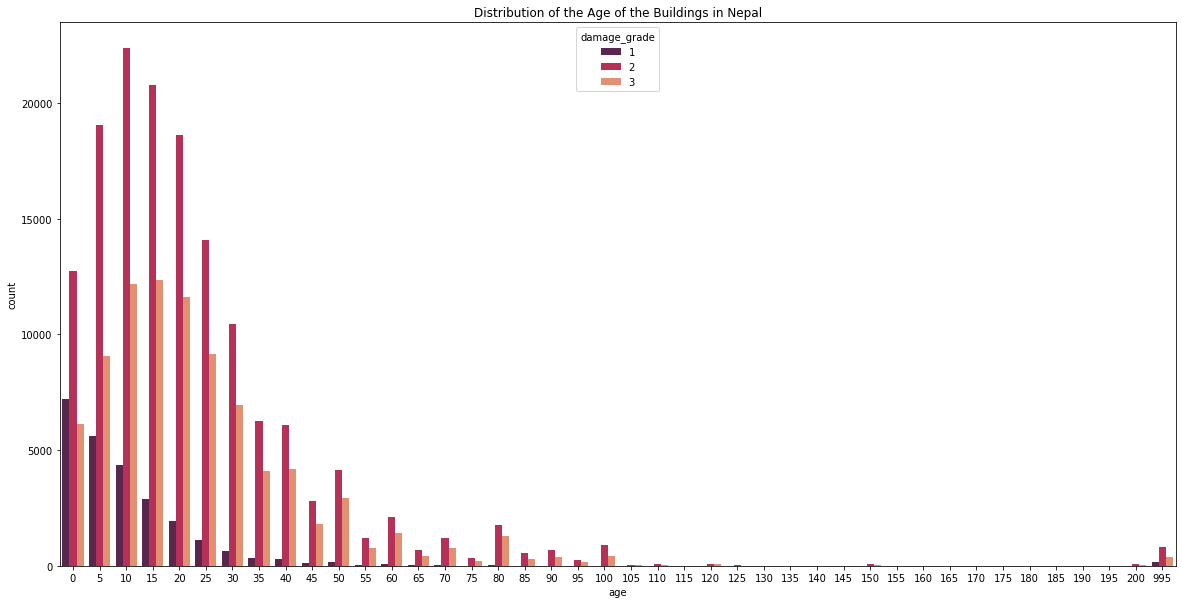

In [ ]:
from matplotlib import rcParams

sns.countplot(x = 'age', data = df_train, palette = "rocket", hue = 'damage_grade')

rcParams['figure.figsize'] = 20,10

plt.title("Distribution of the Age of the Buildings in Nepal");


Majority of the buildings are less than 15 years. The second damage grade is predominant in all ages but more especially in buildings that are less than 20 years old. 

**3.Distribution of Damage grade by the Land Surface Condition**

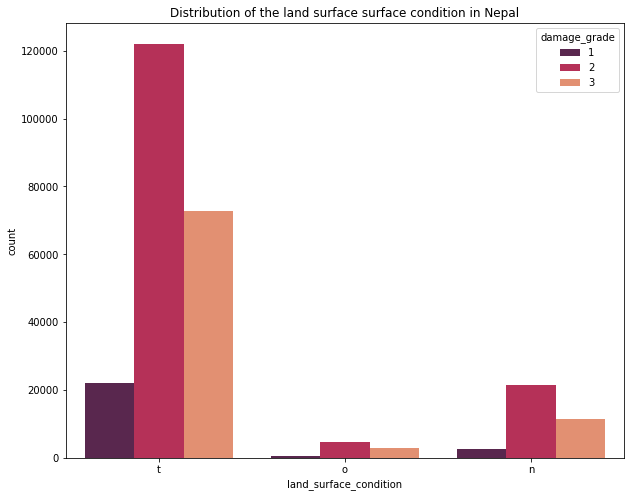

In [ ]:
sns.countplot(x = 'land_surface_condition', data = df_train, palette = "rocket", hue = 'damage_grade')
rcParams['figure.figsize'] = 10,8
plt.title("Distribution of the land surface condition in Nepal");

t is the land surface condition with the highest number of damage grades. It it most likely to suffer for damage during an earth quake. The second grade damage is also the highest looking at the three different surface conditions. 

**4.Distribution of Damage Grade by Foundation Type**

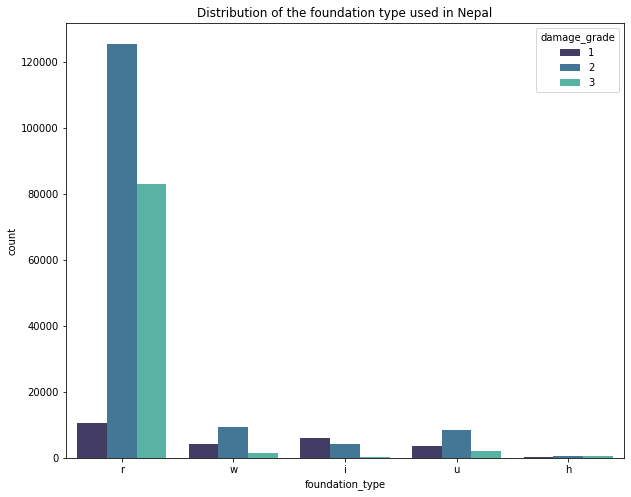

In [ ]:
sns.countplot(x = 'foundation_type', data = df_train, palette = "mako", hue = 'damage_grade')
rcParams['figure.figsize'] = 10,8
plt.title("Distribution of the foundation type used in Nepal");

As indicated in the graph, the **r** foundation type has more damage grade. The building with the **r** foundation type suffered more damage during the earthqauke.Even though the damage grade **2** seems to be predominant in all foundations type, foundation type **i** has suffered mostly by damage grade **3**. 

**5.Distribution of Damage Grade by Number of floors**

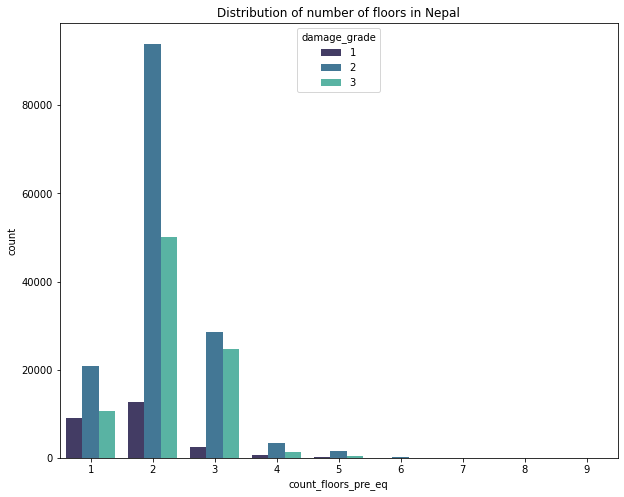

In [ ]:
sns.countplot(x = 'count_floors_pre_eq', data = df_train, palette = "mako", hue= 'damage_grade')
plt.title("Distribution of number of floors in Nepal");

This graph indicates that the number of floors **(2)** mostly commonly affected by the damage. Builings with 2 floors are commonly residential buildings. 

**6.Distribution of Damage Grade by Roof Type**

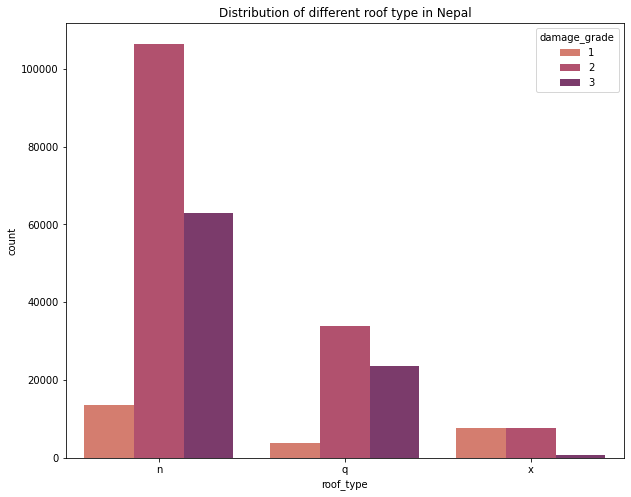

In [ ]:
sns.countplot(x = 'roof_type', data = df_train, palette = "flare", hue= 'damage_grade')
plt.title("Distribution of different roof type in Nepal");

Building with **n** roof type suffered more more damage than the other roof types. roof **x** experinced the least damage however one can notice that both damage grade **2** and **3** are equally experinced with roof type **x**.

- All the building features have exprienced all three different types of damage grade during the earthquake. Buildings that are less thn 50 years have suffered more damage.  Damage grade **2** is the most predominant in the selected building features. 

<a id="features"></a>
## 5. **Feature engineering And Selection**

One of the rules in machine learning is, its important to balance out the data set or at least get it close to balance it. The main reason for this is to give equal priority to each class in laymen terms. Feeding imbalanced data to your classifier can make it biased in favor of the majority class, simply because it did not have enough data to learn about the minority. We saw that damage_grade class 2 is represented more than the others.

In this case we balance our data set. We can balance our data by upsampling
or downsampling.Resampling involves the selection of randomized cases with replacement from the original data sample in such a manner that each number of the sample drawn has a number of cases that are similar to the original data sample.

**Upsampling**:
- Increase the data of the less represented classes. This causes the model to usually overfit since the method relies on randomly repeating the dataset.

**Downsampling**
- randomly select feature data from the overly represented class until it's equal to the under represented class. As good as this method sounds reasonable, it depends on the amount of data available. Downsampling may result in a lot of data lost, and this may have a negative impact in model training and predictive accuracy.

Our data is reasonably good for downsampling. The smallest dataset has at least 25000 rows.


In [ ]:
df_train.columns

In [ ]:
cols = ['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo','has_superstructure_rc_engineered', 'has_superstructure_other','damage_grade']
       
train_data = df_train[cols]


In [ ]:
train_data.damage_grade.value_counts()

In [ ]:
def resample_data(df):
    
    # Determining the class with more tweets
    
    upper_class = int(len(train_data[train_data['damage_grade'] == 1]))
    
    # seperating the 3 classes 
    class_one = train_data[train_data['damage_grade'] == 1] 

    class_two = train_data[train_data['damage_grade'] == 2]

    class_three = train_data[train_data['damage_grade'] == 3]

    
    # upsampling classes
    class_1_down = resample(class_one, replace = False,n_samples = upper_class, random_state = 0)

    class_2_down = resample(class_two,replace = True,n_samples = upper_class, random_state = 0)

    class_3_down = resample(class_three,replace = True,n_samples = upper_class, random_state = 0) # nothing was changed 
    
    # Creating a new DataFrame out of the balanced data
    new_df = pd.concat([class_1_down, class_2_down, class_3_down])

    return new_df

- We downsample the data corresponding to class 2 and 3 to be the same as class 1.

In [ ]:
# applying the resampling function to data
new_df = resample_data(train_data)
df = new_df.sample(frac=1).reset_index(drop=True)

In [ ]:
df.head()

In [ ]:
pred_cols =['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo','has_superstructure_rc_engineered', 'has_superstructure_other']

creating dummy variables

In [ ]:
train_data = pd.get_dummies(train_data)

In [ ]:
train_data.head(2)

In [ ]:
test_data = pd.get_dummies(test_values[pred_cols])

In [ ]:
test_data.head(2)

In [ ]:
# instantiate encoder
le = LabelEncoder()

In [ ]:
# encoding categorical variables


df_train['land_surface_condition'] = le.fit_transform(df_train['land_surface_condition'])
df_train['foundation_type'] = le.fit_transform(df_train['foundation_type'])
df_train['roof_type'] = le.fit_transform(df_train['roof_type'])
df_train['ground_floor_type'] = le.fit_transform(df_train['ground_floor_type'])
df_train['other_floor_type'] = le.fit_transform(df_train['other_floor_type'])
df_train['position'] = le.fit_transform(df_train['position'])
df_train['plan_configuration'] = le.fit_transform(df_train['plan_configuration'])

test_df = test_values[pred_cols]
test_df['land_surface_condition'] = le.fit_transform(test_df['land_surface_condition'])
test_df['foundation_type'] = le.fit_transform(test_df['foundation_type'])
test_df['roof_type'] = le.fit_transform(test_df['roof_type'])
test_df['ground_floor_type'] = le.fit_transform(test_df['ground_floor_type'])
test_df['other_floor_type'] = le.fit_transform(test_df['other_floor_type'])
test_df['position'] = le.fit_transform(test_df['position'])
test_df['plan_configuration'] = le.fit_transform(test_df['plan_configuration'])


In [ ]:
df.head()

In [ ]:
df.info()

<a id="model"></a>
## 6. **Model Building And Evaluation**

In [ ]:
# X and y
# X = df_train[cols].drop('damage_grade', axis = 1)
# y = df_train['damage_grade']
X = train_data.drop('damage_grade', axis = 1)

y = train_data['damage_grade']

In [ ]:
# splitting data for training and testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

####**MultilayerPerceptronClassifier**

Multilayer perceptron classifier (MLPC) is a classifier based on the feedforward artificial neural network. MLPC consists of multiple layers of nodes. Each layer is fully connected to the next layer in the network. Nodes in the input layer represent the input data. All other nodes map inputs to outputs by a linear combination of the inputs with the node’s weights w and bias b and applying an activation function. 

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score

MLP = MLPClassifier(max_iter=300)
MLP.fit(X_train, y_train)

yt_preds = MLP.predict(X_test)

y_preds = MLP.predict(X_train)

print('The train f1_score for MLPClassifier is: {}'.format(f1_score(y_train, y_preds, average='micro')))
print('The test f1_score for MLPClassifier is: {}'.format(f1_score(y_test, yt_preds, average='micro')))

####**GradientBoostingClassifier**
Gradient-boosted trees (GBTs) are a popular classification and regression method using ensembles of decision trees. A decision tree is a decision support tool that uses a tree-like model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility.
Gradient boosting is a machine learning technique used in regression and classification tasks, among others. It gives a prediction model in the form of an ensemble of weak prediction models, which are typically decision trees.When a decision tree is the weak learner, the resulting algorithm is called gradient-boosted trees.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score

GBC = GradientBoostingClassifier(n_estimators = 200, learning_rate = 1.0, max_depth = 5)
GBC.fit(X_train, y_train)

yt_preds = GBC.predict(X_test)

y_preds = GBC.predict(X_train)

print('The train f1_score for GBClassifier is: {}'.format(f1_score(y_train, y_preds, average ='micro')))
print('The test f1_score for GBClassifier is: {}'.format(f1_score(y_test, yt_preds, average = 'micro')))

####**Naive Bayes Classifier**

Naive Bayes methods are a set of supervised learning algorithms based on applying Bayes’ theorem with the “naive” assumption of conditional independence between every pair of features given the value of the class variable. Bayes’ theorem states the following relationship, given class variable y  and dependent feature vector x_1
 through x_2.


In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

yt_preds = gnb.predict(X_test)

y_preds = gnb.predict(X_train)

print('The train f1_score for GBClassifier is: {}'.format(f1_score(y_train, y_preds, average ='micro')))
print('The test f1_score for GBClassifier is: {}'.format(f1_score(y_test, yt_preds, average = 'micro')))

#++++++++++++++++++++++++++++++++=======================================================================



In [ ]:
# Kwanda 
# GradientBoostingClassifier
# Naive Bayes
# MultilayerPerceptronClassifier
# Neural Networks

# Nokulunga
# RandomForestClassifier
# Decision Trees
# LinearSVC
# KNN
#Logistic regression 
#

### **Random Forest Classifier**

Random forests or random decision forests is an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time. For classification tasks, the output of the random forest is the class selected by most trees.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
rfc = RandomForestClassifier(n_estimators=100, max_depth=5,
                                     random_state=0, class_weight="balanced")

#train the model 
rfc.fit(X_train, y_train)
#Validate The Model

#Predict on the valication data 
pred_rfc = rfc.predict(X_test)

print('F1 Score is: ', f1_score(y_test, pred_rfc, average= 'micro')) 


### **Decision Trees Classifier**

Decision Trees are a type of Supervised Machine Learning (that is you explain what the input is and what the corresponding output is in the training data) where the data is continuously split according to a certain parameter. The tree can be explained by two entities, namely decision nodes and leaves.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

#train the model 
dtc.fit(X_train, y_train)
#Validate The Model

#Predict on the valication data 
pred_dtc = dtc.predict(X_test)

print('F1 Score is: ', f1_score(y_test, pred_dtc, average='micro')) 


### **KNeighbors Classifier**

The k-nearest neighbors (KNN) algorithm is a simple, easy-to-implement supervised machine learning algorithm that can be used to solve both classification and regression problems.The KNN algorithm assumes that similar things exist in close proximity. In other words, similar things are near to each other.KNN captures the idea of similarity (sometimes called distance, proximity, or closeness) with some mathematics we might have learned in our childhood— calculating the distance between points on a graph.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

#train the model 
knn.fit(X_train, y_train)
#Validate The Model

#Predict on the valication data 
pred_knn = knn.predict(X_test)

print('F1 Score is: ', f1_score(y_test, pred_knn, average='micro')) 

### **Linear SVC Model**

The objective of a Linear SVC (Support Vector Classifier) is to fit to the data you provide, returning a "best fit" hyperplane that divides, or categorizes, your data. From there, after getting the hyperplane, you can then feed some features to your classifier to see what the "predicted" class is.

In [ ]:
from sklearn.svm import LinearSVC
linear_svc = LinearSVC()

#train the model 
linear_svc.fit(X_train, y_train)
#Validate The Model

#Predict on the valication data 
pred_svc = linear_svc.predict(X_test)

print('F1 Score is: ', f1_score(y_test, pred_svc, average='micro')) 


<a id="evaluation"></a>
## 7. **Model Parameter Tuning**

In [ ]:
# GridSearch on a pipeline

params = {
            'learning_rate': [0.25, 1.0], 'n_estimators' : [180, 200],
          'max_depth' : [5, 7], "min_samples_split" : [2 , 3] 
         }

grid = GridSearchCV(GradientBoostingClassifier(random_state = 42), 
                                          param_grid = params, n_jobs = -1, cv = 2, scoring = 'f1_micro')

# Train model
grid.fit(X_train,y_train)

In [ ]:
# print best parameters

grid.best_params_

In [ ]:
GBC = GradientBoostingClassifier(n_estimators = 180, learning_rate = 0.25, max_depth = 7)
GBC.fit(X_train, y_train)

yt_preds = GBC.predict(X_test)

y_preds = GBC.predict(X_train)

print('The train f1_score for GBClassifier is: {}'.format(f1_score(y_train, y_preds, average ='micro')))
print('The test f1_score for GBClassifier is: {}'.format(f1_score(y_test, yt_preds, average = 'micro')))

### **Load Testing Data**

In [ ]:
models = [MLP, GBC, gnb, rfc, dtc,knn,linear_svc]


In [ ]:
models = [GBC]

In [ ]:

for i in range(0,len(models)):

  result_dict = {'building_id' : test_data['building_id'], #change back to test_df
                 'damage_grade': models[i].predict(test_data)} #change back to test_df

  results = pd.DataFrame(result_dict) # convert dictionary to dataframe

  results.to_csv('Results' + str(i) +'.csv', index = False) # write results to csv file

<a id="conclusion"></a>
## 8. **Conclusion**

<a id="references"></a>
## 9. **References**

1. https://www.britannica.com/science/earthquake-geology

2. 